In [1]:
using Plots
gr()

Plots.GRBackend()

In [2]:
L(p) = p^402 * (1 - p)^598
L(0.1)

0.0

In [3]:
ℓ(p) = 402 * log(p) + 598 * log(1 - p)
ℓ(0.1)

-988.6447957469863

In [4]:
ℓ(0.2)

-780.4338844844058

In [5]:
ℓ(0.4)

-673.8225972254727

In [6]:
ℓ(0.5)

-693.1471805599454

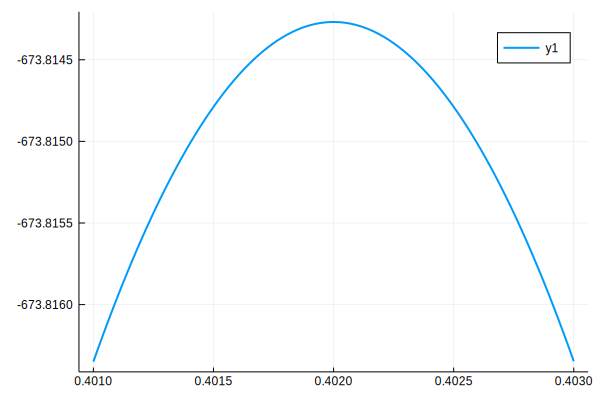

In [11]:
ps = range(0.401, 0.403, length=100)
plot(ps, ℓ.(ps), lw=2)

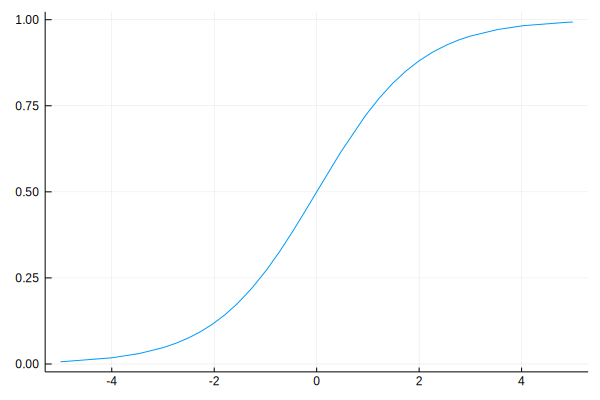

In [13]:
σ(t) = 1 / (1 + exp(-t))
plot(σ, -5, 5, leg=false)

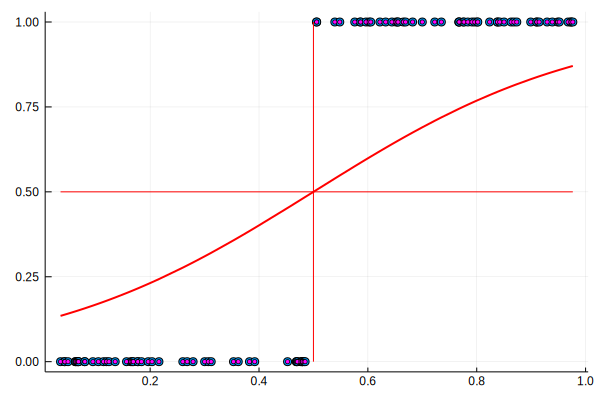

In [83]:
using Random

σ(t) = 1 / (1 + exp(-t))

Random.seed!(0)
n = 100
x = sort(rand(n))
y = [xi + randn() * 0.0 < 0.5 ? 0 : 1 for xi in x]
#x = [0.0; 0.4; 0.6; 1.0]
#y = [0; 1; 0; 1]
scatter(x, y, leg=false)

β = [-2.0; 4.0]
p(β, x) = σ(β[1] + β[2] * x)
px = [p(β, xi) for xi in x]

plot!(x, px, c=:red, lw=2)

threshold = 0.5
y_pred = [p(β, xi) > threshold ? 1 : 0 for xi in x]

scatter!(x, y_pred, c=:magenta, ms=2)
plot!([minimum(x), maximum(x)], [threshold, threshold], c=:red)

x_thr = (log(threshold / (1 - threshold)) - β[1]) / β[2]

plot!([x_thr, x_thr], [0, 1], c=:red)

In [96]:
# JuliaSmoothOptimizers
using LinearAlgebra, NLPModels, JSOSolvers

# ℓ(β) = ∑ yᵢ ln pᵢ + (1 - yᵢ) ln (1 - pᵢ)
# pᵢ = p(β, xᵢ)
λ = 1e-1
ℓ(β) = -sum(y[i] * log(p(β, x[i])) + (1 - y[i]) * log(1 - p(β, x[i])) for i = 1:length(x)) + λ * dot(β, β) / 2
nlp = ADNLPModel(ℓ, [0.0; 1.0])
output = trunk(nlp, max_time=3.0)

┌ Info:   iter      f(x)         π         Δ     ratio   inner      bk         cgstatus  
└ @ JSOSolvers /home/abel/.julia/packages/JSOSolvers/9g3cJ/src/trunk.jl:64
┌ Info:      0   5.9e+01   1.2e+01   1.2e+00   9.9e-01       2       0  on trust-region boundary
└ @ JSOSolvers /home/abel/.julia/packages/JSOSolvers/9g3cJ/src/trunk.jl:154
┌ Info:      1   5.2e+01   1.5e+01   1.8e+00   1.0e+00       3       0  on trust-region boundary
└ @ JSOSolvers /home/abel/.julia/packages/JSOSolvers/9g3cJ/src/trunk.jl:154
┌ Info:      2   3.8e+01   5.7e+00   2.6e+00   1.1e+00       3       0  on trust-region boundary
└ @ JSOSolvers /home/abel/.julia/packages/JSOSolvers/9g3cJ/src/trunk.jl:154
┌ Info:      3   2.9e+01   6.1e+00   4.0e+00   1.2e+00       3       0  solution good enough given atol and rtol
└ @ JSOSolvers /home/abel/.julia/packages/JSOSolvers/9g3cJ/src/trunk.jl:154
┌ Info:      4   2.3e+01   1.6e+00   4.9e+00   1.1e+00       3       0  solution good enough given atol and rtol
└ @ JSOSolvers

"Execution stats: first-order stationary"

In [97]:
print(output)

Generic Execution stats
  status: "first-order stationary"
  objective value: 21.742219294254316
  primal feasibility: 0.0
  dual feasibility: 4.404995668373065e-12
  solution: [-5.17449141661845  10.397267182576813]
  iterations: 8
  elapsed time: 0.39601802825927734


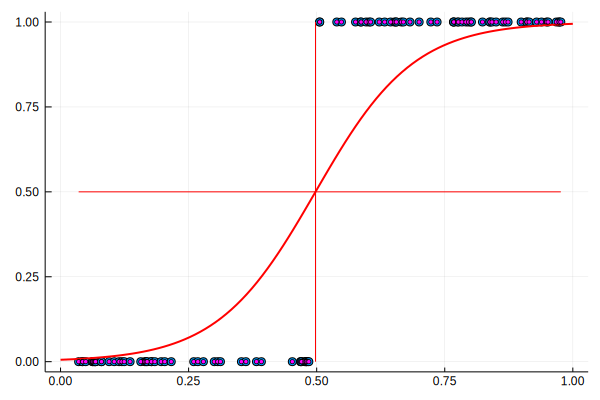

In [98]:
scatter(x, y, leg=false)

β = output.solution
p(β, x) = σ(β[1] + β[2] * x)
xg = range(0, 1, length=100)
px = [p(β, xi) for xi in xg]

plot!(xg, px, c=:red, lw=2)

threshold = 0.5
y_pred = [p(β, xi) > threshold ? 1 : 0 for xi in x]

scatter!(x, y_pred, c=:magenta, ms=2)
plot!([minimum(x), maximum(x)], [threshold, threshold], c=:red)

x_thr = (log(threshold / (1 - threshold)) - β[1]) / β[2]

plot!([x_thr, x_thr], [0, 1], c=:red)

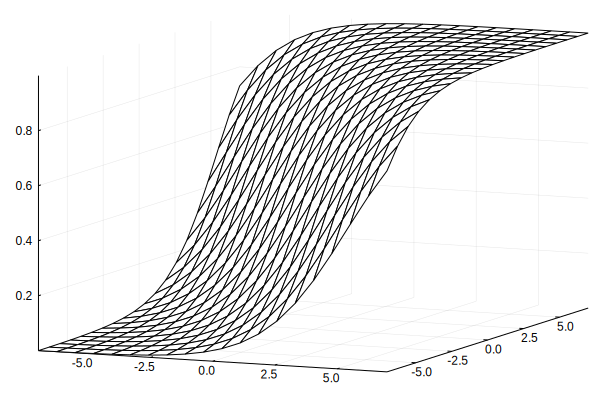

In [74]:
f(a,b) = σ(1.0 + 0.6a + 0.6b)
ag = range(-7, 7, length=20)
bg = range(-7, 7, length=20)
#surface(ag, bg, f)
wireframe(ag, bg, f)